In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# 0.
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# a)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# b)     
total_bill = tips["total_bill"]
tip = tips["tip"]
size = tips["size"]
tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

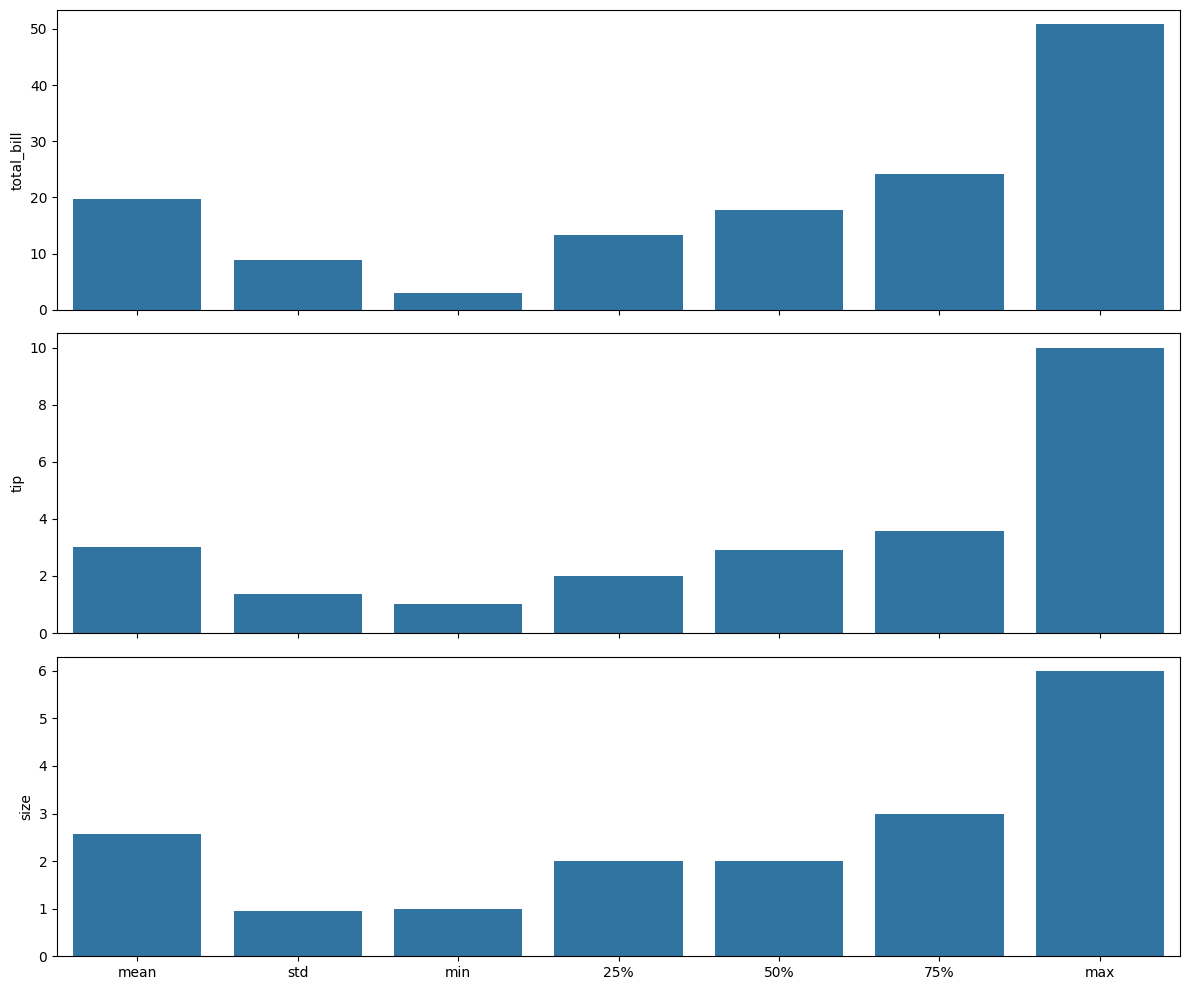

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(["total_bill", "tip", "size"]), ncols=1, figsize=(12, 10), sharex=True)

# define what stats to display
stats_to_display = ["mean", "std", "min", "25%", "50%", "75%", "max"]

# iterate over relevant numerical columns
for i, column in enumerate(["total_bill", "tip", "size"]):
    stats_values = [tips[column].mean(), tips[column].std(), tips[column].min(),
                    tips[column].quantile(0.25), tips[column].quantile(0.50),
                    tips[column].quantile(0.75), tips[column].max()]
    sns.barplot(x=stats_to_display, y=stats_values, ax=axes[i])
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

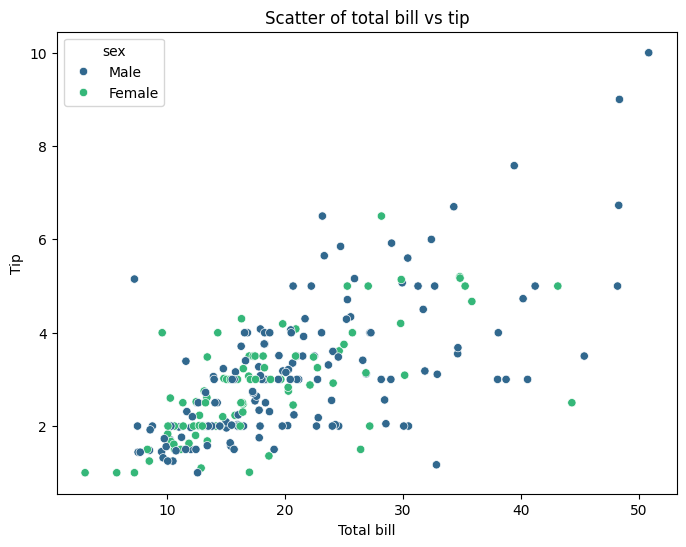

In [9]:
# c)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', palette='viridis')
plt.title('Scatter of total bill vs tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

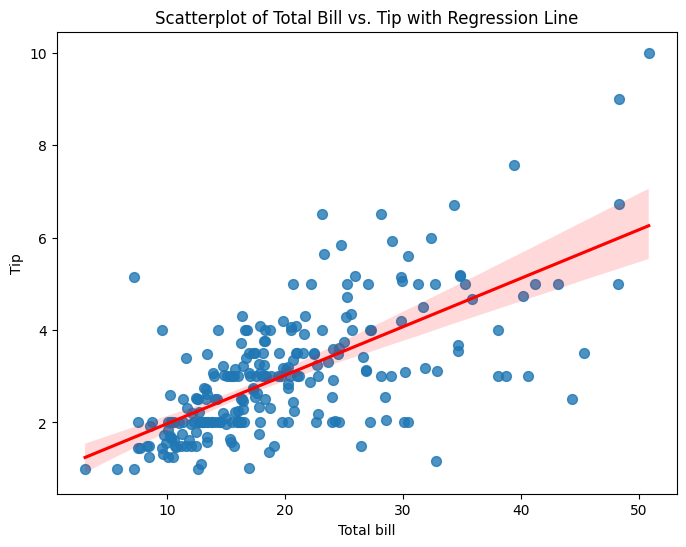

In [10]:
# c)
plt.figure(figsize=(8,6))
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('Scatterplot of Total Bill vs. Tip with Regression Line')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

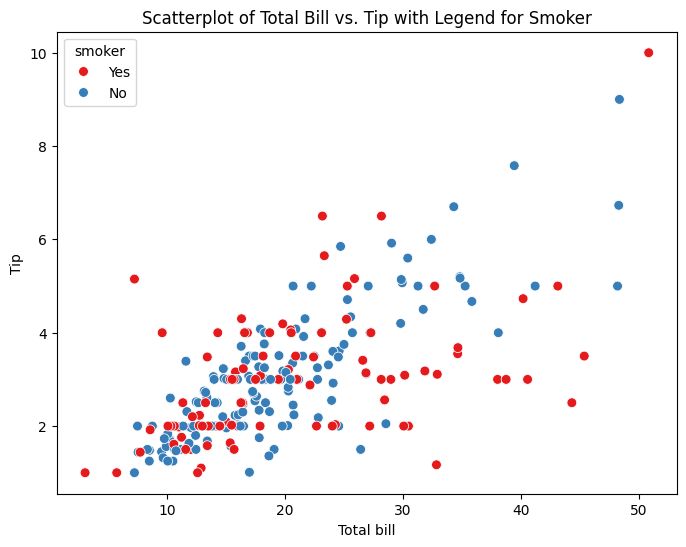

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', palette='Set1', s=50)
plt.title('Scatterplot of Total Bill vs. Tip with Legend for Smoker')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
# 1. Train|test split
from sklearn.model_selection import train_test_split

X = tips[["total_bill", "size"]]
y = tips["tip"]

X_train, X_